In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Dataset

In [4]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sample_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
combine = [train, test]

In [5]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()
print('-'*30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Statistical Analysis

Now let's check on the Correlation of Survived with other variables.

In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**It is observed that 'PClass' and 'Sex' seems to have close relation with survived whereas 'Parch' and 'SibSp' seems to have lesser impact on Survived which is visble from the numerics going to 0.**

# Data Visualisation

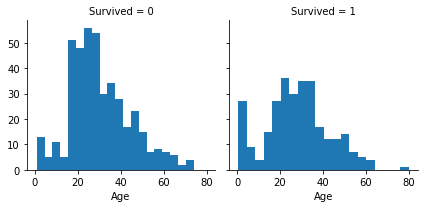

In [13]:
# Histogram betweeen Age and Survived
g=sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist,'Age', bins = 20)

The Ages between 20 to 40 years of age have lesser chances of survival.
The aged people and the younger ones survived better.

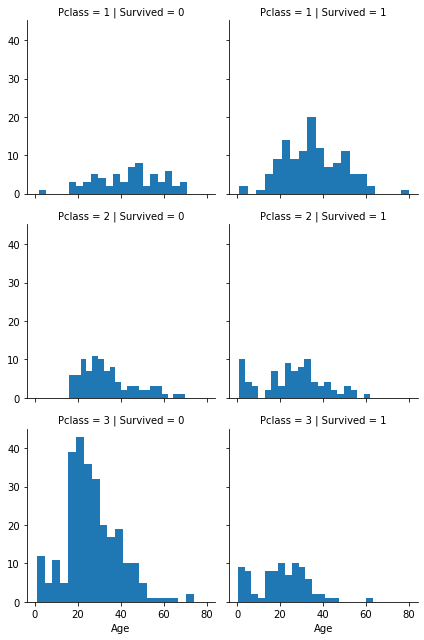

In [14]:
# Histogram between Survived and PClass
g1= sns.FacetGrid(train, col = 'Survived', row = 'Pclass' )
g1.map(plt.hist, 'Age', bins = 20)


This plot also shows that age 20-40 years had lesser chances of survival who were in Pclass = 3.
So, Age and Pclass could be a major determining factor for the person survived or not.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


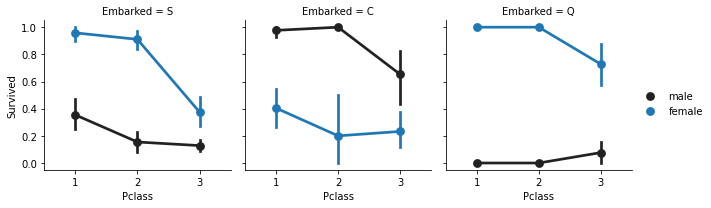

In [15]:
g2 = sns.FacetGrid(train, col = 'Embarked')
g2.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallete = 'deep')
g2.add_legend()

The pointplot clearly shows that males had a greater survival rate in Pclass = 2, whereas it was the other case in Pclass = 1 and 3 where female survival chances was higher.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


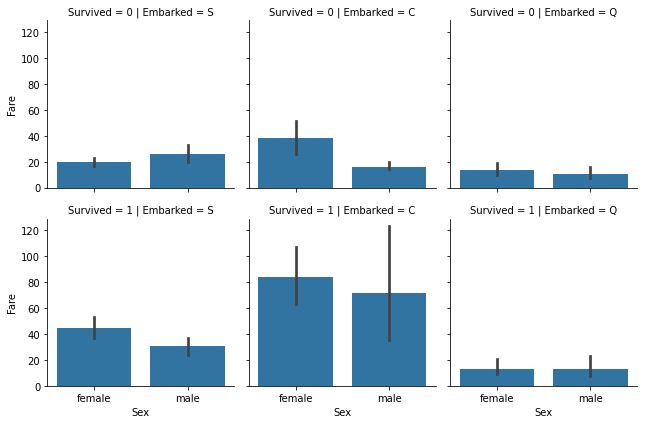

In [16]:
g3 = sns.FacetGrid(train, col = 'Embarked', row = 'Survived')
g3.map(sns.barplot,'Sex', 'Fare')
g3.add_legend()

The barplot too depicts that Sex and Embarked are an important variables for determining survival.

# Fill missing data

In [17]:
for dataset in combine:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
print(train.isnull().sum())
print("-"*10)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Create new columns

1. Creating Age groups

In [18]:
train['AgeGroup'] = pd.cut(train['Age'].astype(int), 5)
train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [19]:
# replacing age with ordinal values in these groups
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ (dataset['Age'] > 64) & (dataset['Age'] <= 80),'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


2. Creating Fare Groups

In [20]:
train['FareGroup'] = pd.cut(train['Fare'],4)
train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [21]:
# replacing fare with ordinal values in these groups
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 128, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128) & (dataset['Fare'] <= 256), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 384), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 384), 'Fare'] = 3
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,"(16.0, 32.0]","(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,0.0,C85,C,"(32.0, 48.0]","(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,"(16.0, 32.0]","(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,0.0,C123,S,"(32.0, 48.0]","(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,0.0,NaN,S,"(32.0, 48.0]","(-0.512, 128.082]"


3. Form Family Size

In [22]:
for dataset in combine:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

4. Form Isalone column

In [23]:
for dataset in combine:
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


5. Form Title Column

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,"(16.0, 32.0]","(-0.512, 128.082]",2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,0.0,C85,C,"(32.0, 48.0]","(-0.512, 128.082]",2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,"(16.0, 32.0]","(-0.512, 128.082]",1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,0.0,C123,S,"(32.0, 48.0]","(-0.512, 128.082]",2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,0.0,NaN,S,"(32.0, 48.0]","(-0.512, 128.082]",1,1,Mr


# Convert categorical variables into numeric

1. Sex into numerical using labelencoder

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for dataset in combine:
    dataset['Sex'] = labelencoder.fit_transform(dataset['Sex'])

2. Embarked into numerical

In [27]:
for dataset in combine:
    dataset['Embarked'] = labelencoder.fit_transform(dataset['Embarked'])


3. Title into numerical

In [28]:
for dataset in combine:
    dataset['Title'] = labelencoder.fit_transform(dataset['Title'])

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.0,NaN,2,"(16.0, 32.0]","(-0.512, 128.082]",2,0,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,0.0,C85,0,"(32.0, 48.0]","(-0.512, 128.082]",2,0,12
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,0.0,NaN,2,"(16.0, 32.0]","(-0.512, 128.082]",1,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,0.0,C123,2,"(32.0, 48.0]","(-0.512, 128.082]",2,0,12
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,NaN,2,"(32.0, 48.0]","(-0.512, 128.082]",1,1,11


In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0.0,NaN,1,1,1,5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0.0,NaN,2,2,0,6
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,0.0,NaN,1,1,1,5
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,0.0,NaN,2,1,1,5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,0.0,NaN,2,3,0,6


# Drop columns

In [31]:
print('Before', train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'AgeGroup', 'FareGroup' ], axis = 1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
combine = [train, test]

print('After', train.shape, test.shape, combine[0].shape, combine[1].shape)

Before (891, 17) (418, 14) (891, 17) (418, 14)
After (891, 11) (418, 11) (891, 11) (418, 11)


In [32]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,1.0,1,0,0.0,2,2,0,11
1,1,1,0,2.0,1,0,0.0,0,2,0,12
2,1,3,0,1.0,0,0,0.0,2,1,1,8
3,1,1,0,2.0,1,0,0.0,2,2,0,12
4,0,3,1,2.0,0,0,0.0,2,1,1,11


# Feature Scaling

1. Scaling Age using MinMaxScalar

In [33]:
#MinMaxScaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
for dataset in combine:
    dataset['Age'] = scaler.fit_transform(dataset.Age.values.reshape(-1, 1))

In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,-0.5,1,0,0.0,2,2,0,11
1,1,1,0,0.0,1,0,0.0,0,2,0,12
2,1,3,0,-0.5,0,0,0.0,2,1,1,8
3,1,1,0,0.0,1,0,0.0,2,2,0,12
4,0,3,1,0.0,0,0,0.0,2,1,1,11


2. Scaling Fare

In [35]:
#MinMaxScaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
for dataset in combine:
    dataset['Fare'] = scaler.fit_transform(dataset.Age.values.reshape(-1, 1))

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,-0.5,1,0,-0.5,2,2,0,11
1,1,1,0,0.0,1,0,0.0,0,2,0,12
2,1,3,0,-0.5,0,0,-0.5,2,1,1,8
3,1,1,0,0.0,1,0,0.0,2,2,0,12
4,0,3,1,0.0,0,0,0.0,2,1,1,11


# **Modelling begins**

Split datasets into test and train

In [37]:
X_train = train.drop('Survived', axis = 1).copy()
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

* **Logistic Regression**

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accu_reg = round(logreg.score(X_train, Y_train) * 100, 2)
accu_reg

79.91

* ** Radial Support Vector Machine**

In [39]:
svc = SVC(kernel = 'rbf', C =1, gamma = 0.1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accu_svc = round(svc.score(X_train, Y_train) *100, 2)
accu_svc

83.39

* **Linear Support Vector Machine**

In [40]:
svc = SVC(kernel = 'linear', C =1, gamma = 0.1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accu_lsvc = round(svc.score(X_train, Y_train) *100, 2)
accu_lsvc

79.12

* **KNN**

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accu_knn = round(svc.score(X_train, Y_train) *100, 2)
accu_knn

79.12

* **Gaussian Naive Bayes**



In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.8

* **Perceptron**

In [43]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.78

* **Linear SVC**

In [44]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.91

* **Stochastic Gradient Descent**



In [45]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.57

* **Decision Tree**

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

* **Random Forest**

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

* **XGB Classifier**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)
acc_clf = round(clf.score(X_train, Y_train)*100, 2)
acc_clf

85.19

In [49]:
models = pd.DataFrame({
    'Model': ['Radial Support Vector Machines', 'Linear Support Vector Machine', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [accu_svc ,accu_lsvc, accu_knn, accu_reg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_clf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,86.87
9,Decision Tree,86.87
10,Gradient Boosting Classifier,85.19
0,Radial Support Vector Machines,83.39
3,Logistic Regression,79.91
8,Linear SVC,79.91
5,Naive Bayes,79.80
7,Stochastic Gradient Decent,79.57
1,Linear Support Vector Machine,79.12
2,KNN,79.12


# Cross Validation

In [50]:
from sklearn.model_selection import KFold #for K-fold cross validation
#from sklearn.model_selection import cross_val_score #score evaluation
#from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
kfold.get_n_splits(X_test)


10

# Boosting

1. Adaboosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X_train,Y_train,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

NameError: name 'cross_val_score' is not defined

2. Stochastic Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X_train,Y_train,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

NameError: name 'cross_val_score' is not defined

XG_Boost

In [53]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X_train,Y_train,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

NameError: name 'cross_val_score' is not defined

In [54]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

submission.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [55]:
submission.to_csv('Submission.csv', index=False)

In [56]:
sample_submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


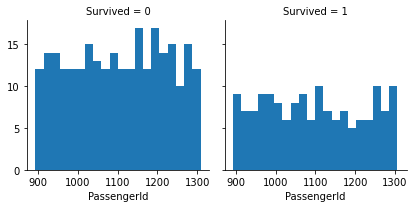

In [57]:
g=sns.FacetGrid(sample_submission, col = 'Survived')
g.map(plt.hist,'PassengerId', bins = 20)

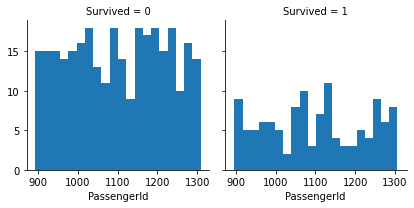

In [58]:
g=sns.FacetGrid(submission, col = 'Survived')
g.map(plt.hist,'PassengerId', bins = 20)